In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)

%matplotlib notebook
import numpy as np

from scipy.signal import find_peaks

# Test data

Here, we generate artificial data which is then used to implement directional analysis.

900


<IPython.core.display.Javascript object>


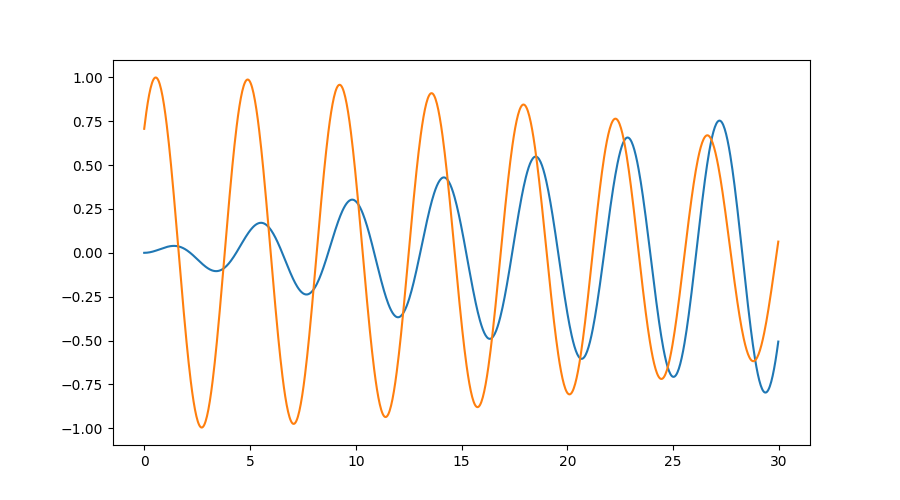

<IPython.core.display.Javascript object>


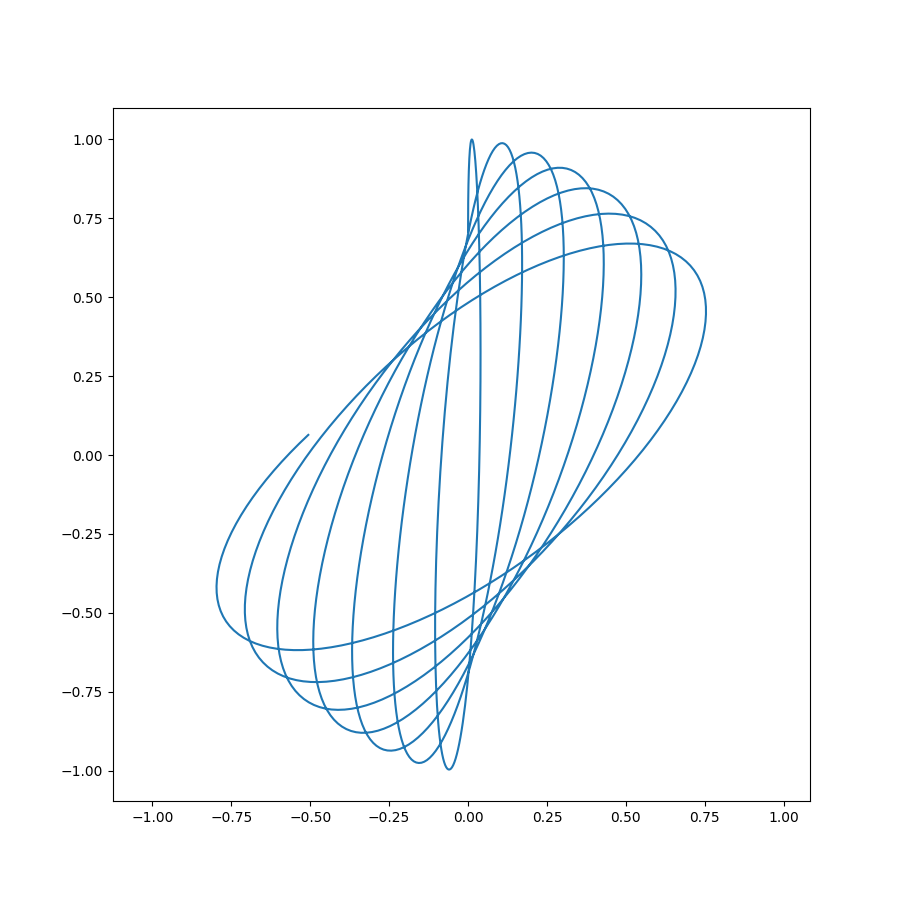

<IPython.core.display.Javascript object>


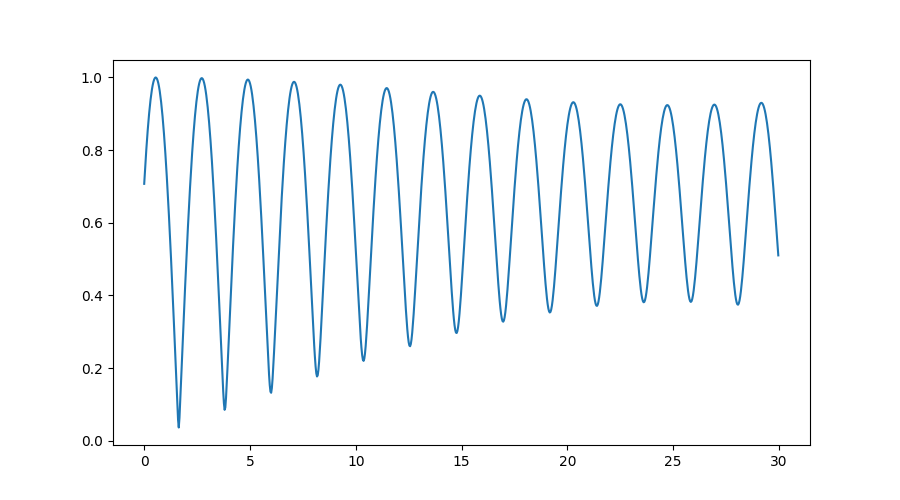

<IPython.core.display.Javascript object>


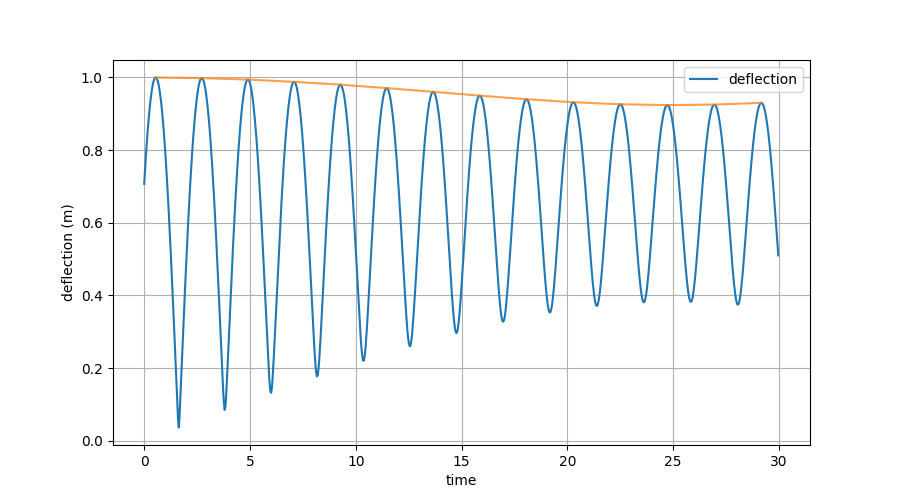

<IPython.core.display.Javascript object>


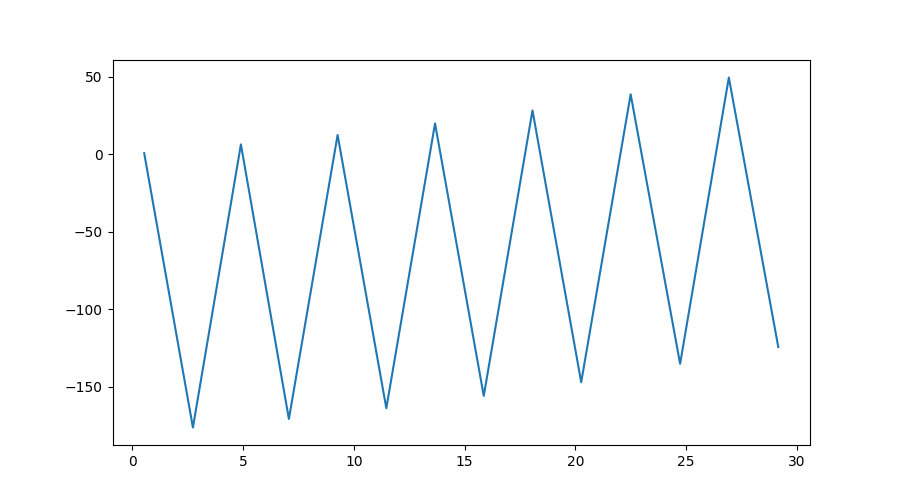

<IPython.core.display.Javascript object>


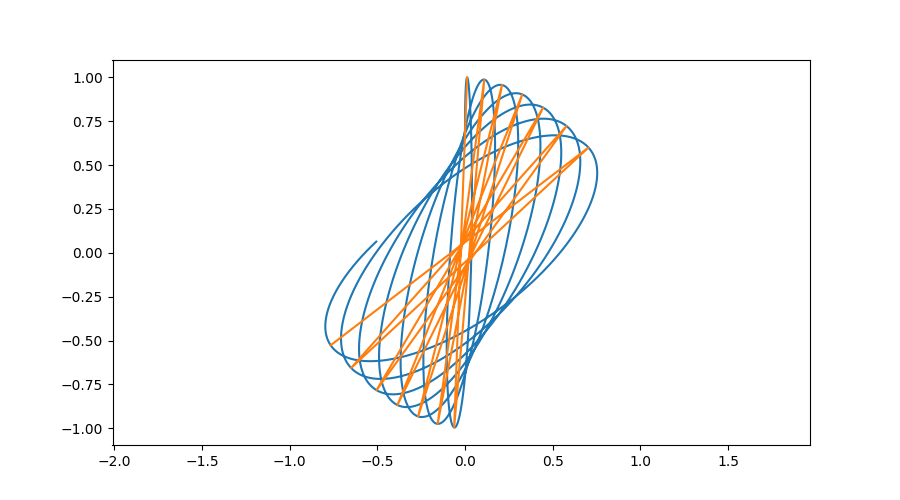

In [2]:
omega = 2 * np.pi * 0.23
theta = np.pi/4.
t = np.arange(0, 30, 1./30.)

print(len(t))

Ax = np.sin(2*np.pi*0.005*t)
Ay = np.cos(2*np.pi*0.005*t)

# Ax = 1
# Ay = 1

x = Ax * np.sin(omega*t)
y = Ay * np.sin(omega*t + theta)

deflection = np.sqrt(np.power(x, 2) + np.power(y, 2))

# signals in the time domain
plt.figure(figsize=(9,5))
plt.plot(t, x)
plt.plot(t, y)

# plot orbit
plt.figure(figsize=(9,9))
plt.plot(x,y)
plt.axis('equal')

# plot deflection
plt.figure(figsize=(9,5))
plt.plot(t, deflection)

# find local peaks
peaks, _ = find_peaks(deflection)
# print(peaks)

# plot amplitude envelope function
plt.figure(figsize=(9, 5))
plt.plot(t, deflection, label="deflection")
plt.plot(t[peaks], deflection[peaks], alpha=0.75)
plt.grid()
plt.xlabel("time")
plt.ylabel("deflection (m)")
plt.legend()


angles = np.arctan2(x[peaks], y[peaks])

# plot angle as a function of time
plt.figure(figsize=(9,5))
plt.plot(t[peaks], np.arctan2(x[peaks], y[peaks])*180/np.pi)

# plot orbit but with each peak connected
plt.figure(figsize=(9,5))
plt.axis("equal")
plt.plot(x, y)
plt.plot(x[peaks], y[peaks])
#plt.plot(1.2*np.sin(angles), 1.2*np.cos(angles))



<IPython.core.display.Javascript object>


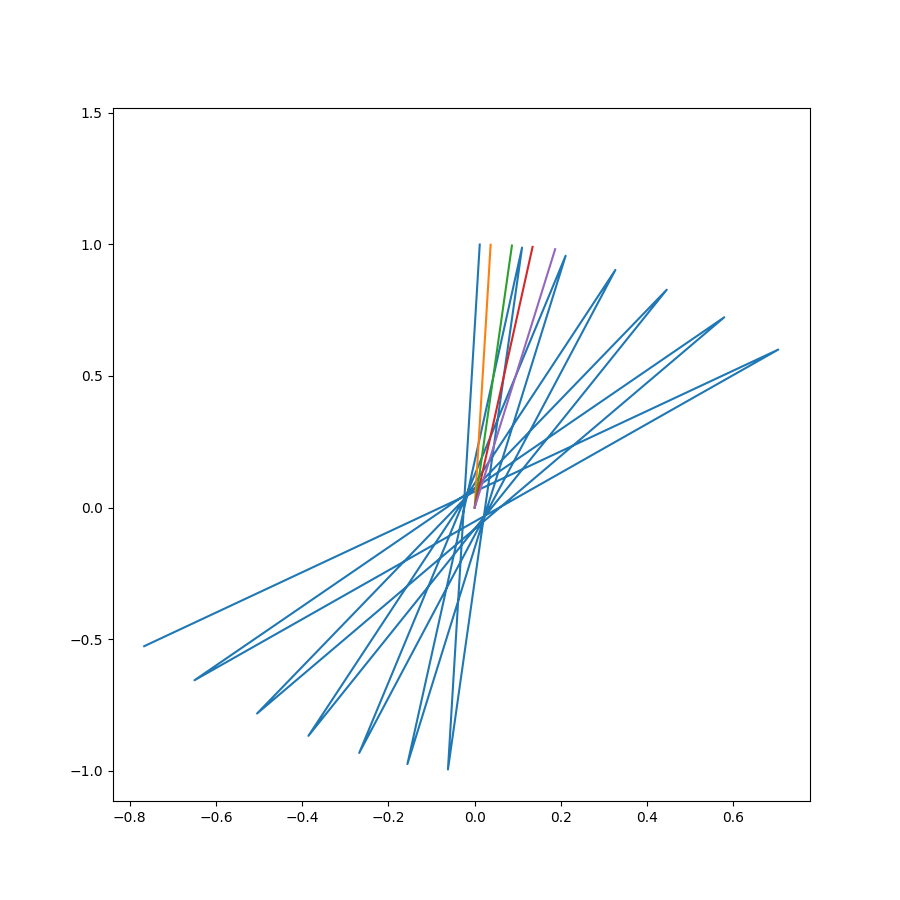

In [3]:
plt.figure(figsize=(9,9))
plt.plot(x[peaks], y[peaks])
x5 = 0.5*np.sin(angles[4])
y5 = 0.5*np.cos(angles[4])
x4 = 0.5*np.sin(angles[3])
y4 = 0.5*np.cos(angles[3])
x3 = 0.5*np.sin(angles[2])
y3 = 0.5*np.cos(angles[2])
x2 = 0.5*np.sin(angles[1])
y2 = 0.5*np.cos(angles[1])
x1 = 0.5*np.sin(angles[0])
y1 = 0.5*np.cos(angles[0])
plt.plot([0, -x2+x1], [0, -y2+y1])
plt.plot([0, -x2+x3], [0, -y2+y3])
plt.plot([0, -x4+x3], [0, -y4+y3])
plt.plot([0, -x4+x5], [0, -y4+y5])
a = np.arctan2(-x2+x1, -y2+y1)
plt.plot(1.4*np.sin(a), 1.4*np.cos(a))

<IPython.core.display.Javascript object>


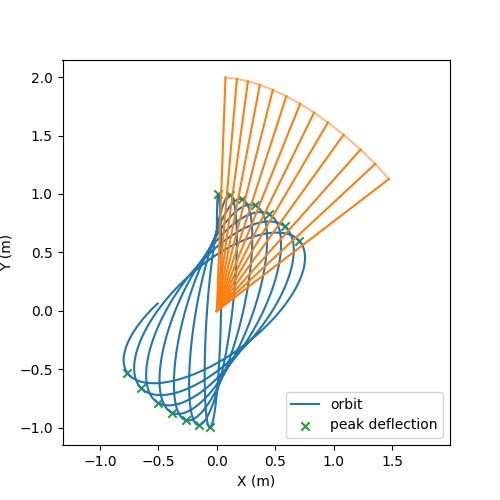

[ 82 147 212 278 344 410 476 542 608 675 742 808 875  16]


<IPython.core.display.Javascript object>


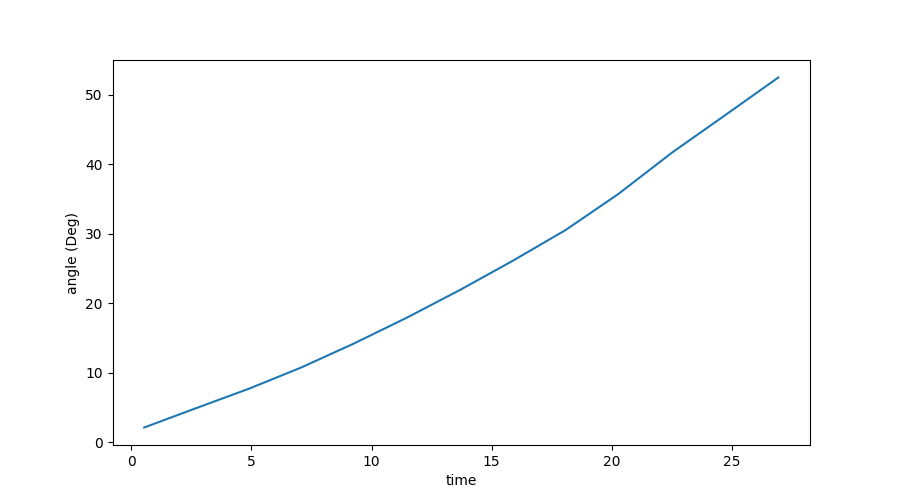

In [19]:
plt.figure(figsize=(5,5))
plt.plot(x, y, label='orbit')
plt.axis('equal')
plt.scatter(x[peaks], y[peaks], marker='x', color='tab:green', label='peak deflection')

peaks_rolled = np.roll(peaks, -1)

print(peaks_rolled)

ax = -x[peaks_rolled[::2]] + x[peaks[::2]]
ay = -y[peaks_rolled[::2]] + y[peaks[::2]]

axx = -x[peaks_rolled[::2]]+x[peaks_rolled[1::2]]
ayy = -y[peaks_rolled[::2]]+y[peaks_rolled[1::2]]

axxx = np.stack((ax, axx), axis=1).flatten()
ayyy = np.stack((ay, ayy), axis=1).flatten()

plt.plot([np.zeros(len(axxx))[:-1], axxx[:-1]], [np.zeros(len(ayyy))[:-1], ayyy[:-1]], color='tab:orange')
plt.plot(axxx[:-1], ayyy[:-1], color='tab:orange', alpha=0.5)

plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.legend()
plt.savefig('geometric_approach.png', dpi=150)

angle = np.arctan2(axxx, ayyy)

plt.figure(figsize=(9,5))
plt.plot(t[peaks[:-1]], angle[:-1]*180/np.pi, label='peak-to-peak angle', color='tab:blue')
plt.xlabel('time')
plt.ylabel('angle (Deg)')
plt.savefig('geometric_approac_angle.png', dpi=150)


In [25]:
def calc_direction(data, peaks):
    peaks_rolled = np.roll(peaks, -1)
    
    data_even = -data[peaks_rolled[::2]] + data[peaks[::2]]
    data_odd  = -data[peaks_rolled[::2]] + data[peaks_rolled[1::2]]
    
    data_combined = np.stack((data_even, data_odd), axis = 1).flatten()
    
    return (data_combined)

def calc_direction_vector(x, y, peaks):
    
    x_combined = calc_direction(x, peaks)
    y_combined = calc_direction(y, peaks)

    return np.array((x_combined, y_combined))

def calc_angle(x, y, peaks, angle='rad'):
    
    direction_vector = calc_direction_vector(x, y, peaks)    
    
    if angle == 'rad':
        return np.arctan2(direction_vector[0], direction_vector[1])
    elif angle == 'deg':
        return np.arctan2(direction_vector[0], direction_vector[1])*180/np.pi


<IPython.core.display.Javascript object>


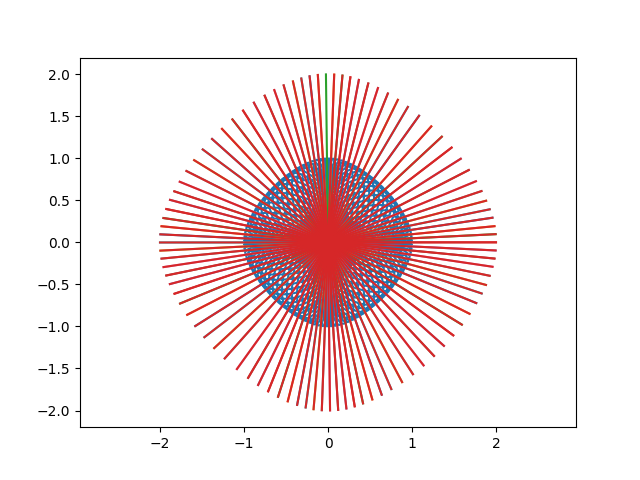

In [37]:
plt.figure()
plt.plot(x, y)
plt.axis('equal')
directions = calc_direction_vector(x, y, peaks)


plt.plot([np.zeros(len(directions[0])), directions[0]],
         [np.zeros(len(directions[1])), directions[1]]
       )
plt.plot([np.zeros(len(axxx))[:-1], axxx[:-1]], [np.zeros(len(ayyy))[:-1], ayyy[:-1]], color='tab:red')
print()

<IPython.core.display.Javascript object>


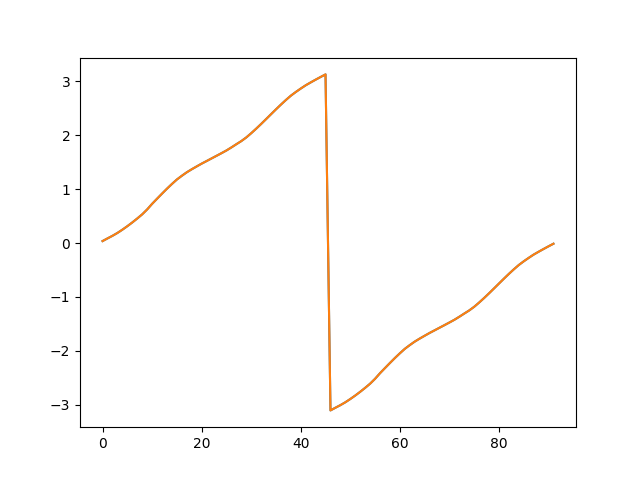

In [42]:
plt.figure()
angles = calc_angle(x, y, peaks,)
plt.plot(angles)
plt.plot(np.arctan2(axxx, ayyy))

In [14]:
plt.figure()
plt.plot(x, y)
plt.axis('equal')
plt.scatter(x[peaks], y[peaks], marker='x', color='tab:red')

peaks_rolled = np.roll(peaks, -1)

print(peaks_rolled)

ax = -x[peaks[1:-1:2]] + x[peaks[:-1:2]]
ay = -y[peaks[1:-1:2]] + y[peaks[:-1:2]]

axx = -x[peaks[1::2]]+x[peaks[3::2]]
ayy = -y[peaks[1::2]]+y[peaks[3::2]]

axxx = np.array(list(zip(ax, axx))).flatten()
ayyy = np.array(list(zip(ay, ayy))).flatten()

axxx = np.array([[i, j] for i, j in zip(ax, axx)]).flatten()

"""
plt.plot([0, ax[0]], [0, ay[0]], linestyle='--', color='tab:green')
plt.plot([0, axx[0]], [0, ayy[0]], linestyle='--', color='tab:orange')
plt.plot([0, ax[1]], [0, ay[1]], linestyle='--', color='tab:green')
plt.plot([0, axx[1]], [0, ayy[1]], linestyle='--', color='tab:orange')
"""
plt.plot([np.zeros(len(axxx))[:-1], axxx[:-1]], [np.zeros(len(ayyy))[:-1], ayyy[:-1]])

angle = np.arctan2(axxx, ayyy)

plt.figure()
plt.plot(angle[:-1]*180/np.pi)


<IPython.core.display.Javascript object>

[  82  147  212  278  344  410  476  542  608  675  742  808  875  941
 1008 1074 1140 1206 1271 1337 1402 1467 1533 1598 1663 1728 1792 1857
 1922 1986 2050 2114 2178 2242 2306 2370 2434 2498 2562 2627 2691 2756
 2821 2886 2951 3016 3082 3147 3212 3278 3344 3410 3476 3542 3608 3675
 3742 3808 3875 3941 4008 4074 4140 4206 4271 4337 4402 4467 4533 4598
 4663 4728 4792 4857 4922 4986 5050 5114 5178 5242 5306 5370 5434 5498
 5562 5627 5691 5756 5821 5886 5951   16]


ValueError: operands could not be broadcast together with shapes (45,) (46,) 

In [63]:
np.array(list(zip(ax, ay))).flatten()

array([0.07369792, 1.99580321, 0.26579637, 1.9635525 , 0.47867122,
       1.89016965, 0.71182993, 1.77128172, 0.94990518, 1.61113866,
       1.22839763, 1.37990264, 1.47024812, 1.12758573])

In [42]:
print(peaks)
print(peaks[::2])
print(peaks[1::2])

[ 16  82 147 212 278 344 410 476 542 608 675 742 808 875]
[ 16 147 278 410 542 675 808]
[ 82 212 344 476 608 742 875]


In [15]:
print(peaks[0::2])
print(peaks_rolled[0::2])
print(np.zeros(len(peaks)))
plt.plot([np.zeros(len(peaks)), -x[peaks_rolled[0::2]]+x[peaks[0::2]]],
         [np.zeros(len(peaks)), -y[peaks_rolled[0::2]]+y[peaks[0::2]]],
         color='tab:green'
        )

[  16  147  278  410  542  675  808  941 1074 1206 1337 1467 1598 1728
 1857 1986 2114 2242 2370 2498 2627 2756 2886 3016 3147 3278 3410 3542
 3675 3808 3941 4074 4206 4337 4467 4598 4728 4857 4986 5114 5242 5370
 5498 5627 5756 5886]
[  82  212  344  476  608  742  875 1008 1140 1271 1402 1533 1663 1792
 1922 2050 2178 2306 2434 2562 2691 2821 2951 3082 3212 3344 3476 3608
 3742 3875 4008 4140 4271 4402 4533 4663 4792 4922 5050 5178 5306 5434
 5562 5691 5821 5951]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


ValueError: setting an array element with a sequence.

In [42]:
peaks_rolled = np.roll(peaks, -1)

In [43]:
peaks

array([ 16,  82, 147, 212, 278, 344, 410, 476, 542, 608, 675, 742, 808,
       875])

In [44]:
peaks_rolled

array([ 82, 147, 212, 278, 344, 410, 476, 542, 608, 675, 742, 808, 875,
        16])

In [40]:
plt.plot(x[peaks]-x[peaks_rolled], y[peaks]-y[peaks_rolled])

In [25]:
np.arctan2(x[peaks], y[peaks])*180/np.pi

array([   0.66890195, -176.43669812,    6.3394218 , -170.91268002,
         12.42429444, -163.98499152,   19.85954803, -156.04942199,
         28.27145153, -147.20517658,   38.66518025, -135.30604329,
         49.5389975 , -124.52667108,   60.07647621, -114.51718385,
         69.57996309, -106.57180423,   77.01985344, -100.15155795,
         83.06522892,  -94.19986371,   88.57326158,  -88.62603876,
         94.13032087,  -83.03640483,   99.88596462,  -76.5506665 ,
        106.70479418,  -69.92429249,  114.44139373,  -60.8906512 ,
        124.03015207,  -50.86348814,  134.34606099])

In [ ]:
fig = plt.figure(figsize=(9,9))
ax = plt.axes(xlim=(-1, 1), 
              ylim=(-1, 1), 
              xlabel="lateral deflection (m)", 
              ylabel="longitudinal deflection (m)",
              title="Test Data"
             )
line, = ax.plot([], [], lw=2)
ax.grid()

# fig.figimage(watermark, 210, 1050, zorder=1, alpha=.5)
# time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
# text = ax.text(0.55, 0.97, '', transform=ax.transAxes,  fontsize=12)


def init():
    ax.set_xlabel="Lateral deflection"
    ax.set_ylabel="Longitudinal deflection"
    line.set_data([], [])
    return line,

def animate(i):
    # x = np.linspace(0, 1, 20)
    # y = np.sin(2 * np.pi * (x - 0.01 * i))
    xi = x[:i]
    yi = y[:i]
    line.set_data(xi, yi)
    #plt.savefig("animation_frames/2019-09-05-03-40/frame_{:04d}.png".format(i), dpi=150)
    return line,

anim = FuncAnimation(fig, 
                     animate, 
                     init_func=init,
                     frames=6000, 
                     interval=1, 
                     blit=True, 
                     repeat=True,
                    )

# anim.save('Testdata.mp4', writer=writer)
# anim.save('Orbit.gif', writer='imagemagick')

<IPython.core.display.Javascript object>